# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [1369]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [1370]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [1371]:
#properties.shape

In [1372]:
#properties.head()

In [1373]:
#properties = properties.transpose()

In [1374]:
#properties.head()

In [1375]:
#properties.index

In [1376]:
#properties = properties.reset_index()

In [1377]:
#properties.index

In [1378]:
#properties.head()

In [1379]:
#properties.columns

In [1380]:
#properties.iloc[[0]] # row access

In [1381]:
#properties.columns = properties.iloc[0] # assigning values of first row to column Headings
#properties.head()

In [1382]:
#properties.drop(0, inplace=True, axis=0)
#properties.head()

In [1383]:
#properties.rename(columns={'Unnamed: 0':'London_Borough', pd.NaT: 'ID'}, inplace=True) 
#properties.head()

In [1384]:
#properties.columns

In [1385]:
#clean_properties = pd.melt(properties, id_vars=['London_Borough', 'ID'])
#clean_properties.head()

In [1386]:
#clean_properties.rename(columns={0:'Month', 'value': 'Average_price'}, inplace=True)
#clean_properties.head()

In [1387]:
#clean_properties.dtypes

In [1388]:
#clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'], downcast='float')

In [1389]:
#clean_properties.dtypes

In [1390]:
#clean_properties.count() #HOW TO FIND MISSING VALUES USING COUNT? COUNT GIVES NUMBERS OF NON-NULL VALUES
#clean_properties.info # FOR NON-NULL

In [1391]:
#count only gives you length
#clean_properties.isna().sum() #sum of nullvalues

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [1392]:
properties.shape

(304, 49)

In [1393]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [1394]:
properties = properties.transpose()
properties.head()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,104473,...,761526,756407,813770,810455,826227,776894,737275,757377,765416,792583
Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,51471.6,...,293889,297426,299421,304778,304579,306390,301283,304187,304719,327136
Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,93273.1,...,512694,514668,528577,526670,525678,522639,519306,520115,520966,532569
Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,64509.5,...,339324,338346,337523,333340,332920,333657,336302,334430,334845,331679


In [1395]:
properties.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [1396]:
properties = properties.reset_index()

In [1397]:
properties.index

RangeIndex(start=0, stop=49, step=1)

In [1398]:
properties.head()

,index,0,1,2,3,4,5,6,7,8,...,294,295,296,297,298,299,300,301,302,303
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,761526,756407,813770,810455,826227,776894,737275,757377,765416,792583
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,293889,297426,299421,304778,304579,306390,301283,304187,304719,327136
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,512694,514668,528577,526670,525678,522639,519306,520115,520966,532569
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,339324,338346,337523,333340,332920,333657,336302,334430,334845,331679


In [1399]:
properties.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
           294,     295,     296,     297,     298,     299,     300,     301,
           302,     303],
      dtype='object', length=305)

In [1400]:
properties.iloc[[0]] #row access

,index,0,1,2,3,4,5,6,7,8,...,294,295,296,297,298,299,300,301,302,303
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00


In [1401]:
properties.columns = properties.iloc[0] #assigning values of first row to column header
properties.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,761526,756407,813770,810455,826227,776894,737275,757377,765416,792583
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,293889,297426,299421,304778,304579,306390,301283,304187,304719,327136
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,512694,514668,528577,526670,525678,522639,519306,520115,520966,532569
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,339324,338346,337523,333340,332920,333657,336302,334430,334845,331679


In [1402]:
properties.drop(0, inplace=True, axis=0)
properties.head()

,Unnamed: 0,NaN,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,761526,756407,813770,810455,826227,776894,737275,757377,765416,792583
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,293889,297426,299421,304778,304579,306390,301283,304187,304719,327136
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,512694,514668,528577,526670,525678,522639,519306,520115,520966,532569
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,339324,338346,337523,333340,332920,333657,336302,334430,334845,331679
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,474821,473849,488784,501533,494770,432188,427126,424663,471574,446966


**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [1403]:
properties.rename(columns={'Unnamed: 0':'London_Borough', pd.NaT: 'ID'}, inplace=True) 
properties.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00
1,City of London,E09000001,91449,82202.8,79120.7,77101.2,84409.1,94900.5,110128,112329,...,761526,756407,813770,810455,826227,776894,737275,757377,765416,792583
2,Barking & Dagenham,E09000002,50460.2,51085.8,51269,53133.5,53042.2,53700.3,52113.1,52232.2,...,293889,297426,299421,304778,304579,306390,301283,304187,304719,327136
3,Barnet,E09000003,93284.5,93190.2,92247.5,90762.9,90258,90107.2,91441.2,92361.3,...,512694,514668,528577,526670,525678,522639,519306,520115,520966,532569
4,Bexley,E09000004,64958.1,64787.9,64367.5,64277.7,63997.1,64252.3,63722.7,64432.6,...,339324,338346,337523,333340,332920,333657,336302,334430,334845,331679
5,Brent,E09000005,71306.6,72022.3,72015.8,72965.6,73704,74310.5,74127,73547,...,474821,473849,488784,501533,494770,432188,427126,424663,471574,446966


In [1404]:
properties.columns

Index([   'London_Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2019-06-01 00:00:00, 2019-07-01 00:00:00, 2019-08-01 00:00:00,
       2019-09-01 00:00:00, 2019-10-01 00:00:00, 2019-11-01 00:00:00,
       2019-12-01 00:00:00, 2020-01-01 00:00:00, 2020-02-01 00:00:00,
       2020-03-01 00:00:00],
      dtype='object', name=0, length=305)

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [1405]:
clean_properties = pd.melt(properties, id_vars=['London_Borough', 'ID'])
clean_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


In [1406]:
clean_properties.rename(columns={0:'Month', 'value': 'Average_price'}, inplace=True)
clean_properties.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91449
1,Barking & Dagenham,E09000002,1995-01-01,50460.2
2,Barnet,E09000003,1995-01-01,93284.5
3,Bexley,E09000004,1995-01-01,64958.1
4,Brent,E09000005,1995-01-01,71306.6


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [1407]:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price             object
dtype: object

In [1408]:
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'], downcast='float')

In [1409]:
clean_properties.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float32
dtype: object

In [1410]:
#clean_properties.count() #will give you total number of non-null values 
clean_properties.info # to see all the non-null values

<bound method DataFrame.info of            London_Borough         ID      Month  Average_price
0          City of London  E09000001 1995-01-01   91448.984375
1      Barking & Dagenham  E09000002 1995-01-01   50460.226562
2                  Barnet  E09000003 1995-01-01   93284.515625
3                  Bexley  E09000004 1995-01-01   64958.089844
4                   Brent  E09000005 1995-01-01   71306.570312
...                   ...        ...        ...            ...
14539              LONDON  E12000007 2020-03-01  485794.093750
14540          SOUTH EAST  E12000008 2020-03-01  323353.062500
14541          SOUTH WEST  E12000009 2020-03-01  263360.031250
14542         Unnamed: 47        NaN 2020-03-01            NaN
14543             England  E92000001 2020-03-01  248271.187500

[14544 rows x 4 columns]>

In [1411]:
#count only gives you length. Using isna + sum gives total no. of null values
clean_properties.isna().sum() #sum of nullvalues

London_Borough      0
ID                909
Month               0
Average_price     909
dtype: int64

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [1412]:
pd.unique(clean_properties['London_Borough']) #looking for unique names inside london borough column, need only 32 in total. 

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

In [1413]:
clean_properties[(clean_properties.London_Borough == 'Unnamed: 34')] # looking for null values in names that are not boroughs
# OR use clean_properties[clean_properties['London_Borough'] == 'Unnamed: 34'].head()

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
129,Unnamed: 34,NaN,1995-03-01,NaN
177,Unnamed: 34,NaN,1995-04-01,NaN
225,Unnamed: 34,NaN,1995-05-01,NaN
...,...,...,...,...
14337,Unnamed: 34,NaN,2019-11-01,NaN
14385,Unnamed: 34,NaN,2019-12-01,NaN
14433,Unnamed: 34,NaN,2020-01-01,NaN
14481,Unnamed: 34,NaN,2020-02-01,NaN


In [1414]:
clean_properties[clean_properties['ID'].isna()]

,London_Borough,ID,Month,Average_price
33,Unnamed: 34,NaN,1995-01-01,NaN
36,Unnamed: 37,NaN,1995-01-01,NaN
46,Unnamed: 47,NaN,1995-01-01,NaN
81,Unnamed: 34,NaN,1995-02-01,NaN
84,Unnamed: 37,NaN,1995-02-01,NaN
...,...,...,...,...
14484,Unnamed: 37,NaN,2020-02-01,NaN
14494,Unnamed: 47,NaN,2020-02-01,NaN
14529,Unnamed: 34,NaN,2020-03-01,NaN
14532,Unnamed: 37,NaN,2020-03-01,NaN


In [1415]:
clean_properties.shape #shape before removing null values

(14544, 4)

In [1416]:
null_free_df = clean_properties.dropna() # removing null values

In [1417]:
null_free_df.shape # resulting shape after dropping null values

(13635, 4)

In [1418]:
null_free_df.count()

London_Borough    13635
ID                13635
Month             13635
Average_price     13635
dtype: int64

In [1419]:
nonB = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

In [1420]:
df = null_free_df[~null_free_df.London_Borough.isin(nonB)] #~something.isin(somewhere)
df.head()

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01,91448.984375
1,Barking & Dagenham,E09000002,1995-01-01,50460.226562
2,Barnet,E09000003,1995-01-01,93284.515625
3,Bexley,E09000004,1995-01-01,64958.089844
4,Brent,E09000005,1995-01-01,71306.570312


In [1421]:
df.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Average_price            float32
dtype: object

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

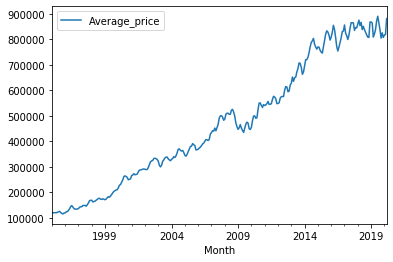

In [1422]:
#df.plot(x='Month', y='Average_price') #PLOTTING ALL THE BOROUGHS
Camden_Prices = df[(df.London_Borough == 'Camden')] # Extracting prices only for Camden
Camden_Prices.plot(x='Month', y='Average_price') #Plotting Camden Borough Prices against Month

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [1423]:
#df['Year'] = df['Month'].apply(lambda t: t.year) - as suggested in Tier 2, also RETURNS A WARNING
df['Year'] = pd.DatetimeIndex(df['Month']).year
df.head()

C:\Users\sesa518180\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,London_Borough,ID,Month,Average_price,Year
0,City of London,E09000001,1995-01-01,91448.984375,1995
1,Barking & Dagenham,E09000002,1995-01-01,50460.226562,1995
2,Barnet,E09000003,1995-01-01,93284.515625,1995
3,Bexley,E09000004,1995-01-01,64958.089844,1995
4,Brent,E09000005,1995-01-01,71306.570312,1995


In [1424]:
dfg = df.groupby(['London_Borough', 'Year']).agg({'Average_price': 'mean'})
dfg.head(28)

Average_price
London_Borough     Year               
Barking & Dagenham 1995   51817.968750
                   1996   51718.191406
                   1997   55974.261719
                   1998   60285.820312
                   1999   65320.933594
                   2000   77549.515625
                   2001   88664.062500
                   2002  112221.914062
                   2003  142498.921875
                   2004  158175.984375
                   2005  163360.781250
                   2006  167853.343750
                   2007  184909.812500
                   2008  187356.859375
                   2009  156446.906250
                   2010  166560.703125
                   2011  163465.140625
                   2012  165863.906250
                   2013  173733.625000
                   2014  201172.234375
                   2015  233460.109375
                   2016  273919.625000
                   2017  287734.718750
                   2018  295196.687500
                   2019  298620.187500
                   2020  312014.156250
Barnet             1995   91792.539062
                   1996   94000.445312

In [1425]:
dfg = dfg.reset_index()
dfg.head(32)

,London_Borough,Year,Average_price
0,Barking & Dagenham,1995,51817.968750
1,Barking & Dagenham,1996,51718.191406
2,Barking & Dagenham,1997,55974.261719
3,Barking & Dagenham,1998,60285.820312
4,Barking & Dagenham,1999,65320.933594
5,Barking & Dagenham,2000,77549.515625
6,Barking & Dagenham,2001,88664.062500
7,Barking & Dagenham,2002,112221.914062
8,Barking & Dagenham,2003,142498.921875
9,Barking & Dagenham,2004,158175.984375


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [1426]:
# Here's where you should write your function:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y1998/y2018]
    return ratio

In [1427]:
#  Test out the function by calling it with the following argument:
# dfg[dfg['London_Borough']=='Barking & Dagenham']
create_price_ratio(dfg[dfg['London_Borough']=='Barking & Dagenham'])

[0.20422255013447602]

In [1428]:
# Creating a blank list to store ratios for all boroughs
mylist = []

In [1429]:
# Iterating through each item/borough inside the column 'London_Borough'
for i in dfg['London_Borough'].unique():
    currentB = dfg[dfg['London_Borough'] == i]
    # adding the computed ratio to the previously created blank list for each iteration
    mylist.append(create_price_ratio(currentB))
print(mylist)

[[0.20422255013447602], [0.22945273031252544], [0.23535073694856556], [0.2043086916459346], [0.24421306606752216], [0.20261972211140844], [0.18862158079570648], [0.2380328819154613], [0.23194049168131192], [0.23455064777897316], [0.20995012641005267], [0.1613349338921729], [0.24167443761653734], [0.19475620030436364], [0.24635417480630376], [0.23120155284116423], [0.23807976287339147], [0.25148317493943917], [0.20643890630011874], [0.1967549200850771], [0.23416189981826138], [0.20170434777827703], [0.18351247042239494], [0.2109138095471929], [0.18848755561977312], [0.22365451336893807], [0.24967778763372928], [0.18127484113941827], [0.24280552836005267], [0.21613671329361428], [0.17138678565395812], [0.21018518159647012], [0.18679140847248635]]


In [1430]:
# converting the list to a DataFrame
dfr = pd.DataFrame(mylist)
dfr.head()

,0
0,0.204223
1,0.229453
2,0.235351
3,0.204309
4,0.244213


In [1431]:
# All we need to do now is transpose it, and reset the index! - WHY TRANSPOSE?
dfr_T = dfr.T
dfr = dfr_T.reset_index()
dfr.head()

,index,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,0,0.204223,0.229453,0.235351,0.204309,0.244213,0.20262,0.188622,0.238033,0.23194,...,0.210914,0.188488,0.223655,0.249678,0.181275,0.242806,0.216137,0.171387,0.210185,0.186791


In [1432]:
# Let's just rename the 'index' column as 'London_Borough', and the '0' column to '2018'.
dfr.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
dfr.head()

,Borough,2018,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,0,0.204223,0.229453,0.235351,0.204309,0.244213,0.20262,0.188622,0.238033,0.23194,...,0.210914,0.188488,0.223655,0.249678,0.181275,0.242806,0.216137,0.171387,0.210185,0.186791


In [1433]:
# Sorting price ratios in descending order
top15 = dfr.sort_values(by='2018',ascending=False).head(15)
print(top15)

   Borough      2018         1         2         3         4        5  \
0        0  0.204223  0.229453  0.235351  0.204309  0.244213  0.20262   

          6         7        8  ...        23        24        25        26  \
0  0.188622  0.238033  0.23194  ...  0.210914  0.188488  0.223655  0.249678   

         27        28        29        30        31        32  
0  0.181275  0.242806  0.216137  0.171387  0.210185  0.186791  

[1 rows x 34 columns]


[Text(0, 0, '0')]

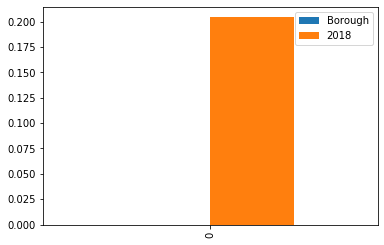

In [1434]:
# Let's plot the boroughs that have seen the greatest changes in price.
# Make a variable called ax. Assign it the result of filtering top15 on 'Borough' and '2018', then calling plot(), with
# the parameter kind = 'bar'. 
ax = top15[['Borough','2018']].plot(kind='bar')
ax.set_xticklabels(top15.Borough)

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

In [1435]:
'''Conclusion:
1. 


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-1435-e9d2f1c440dc>, line 2)